/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.assign` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/missingno/missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name w

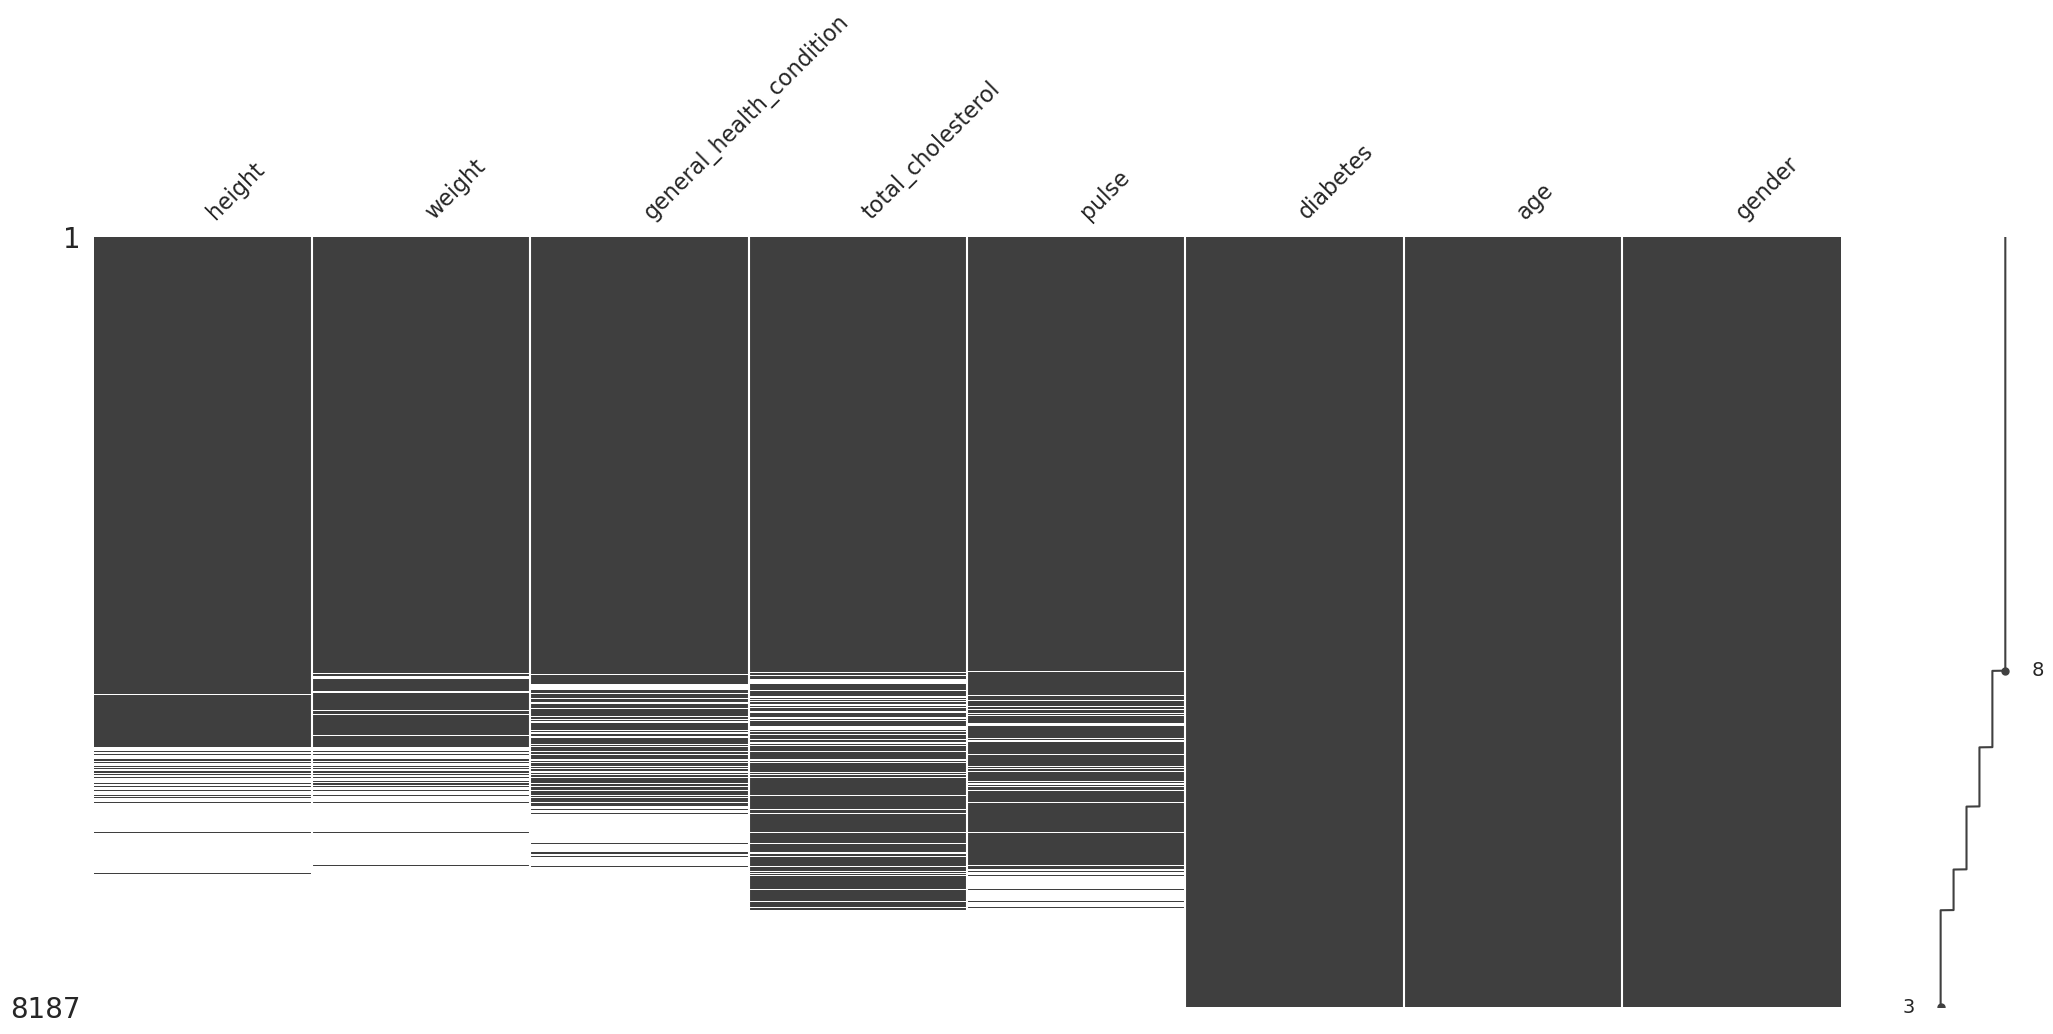

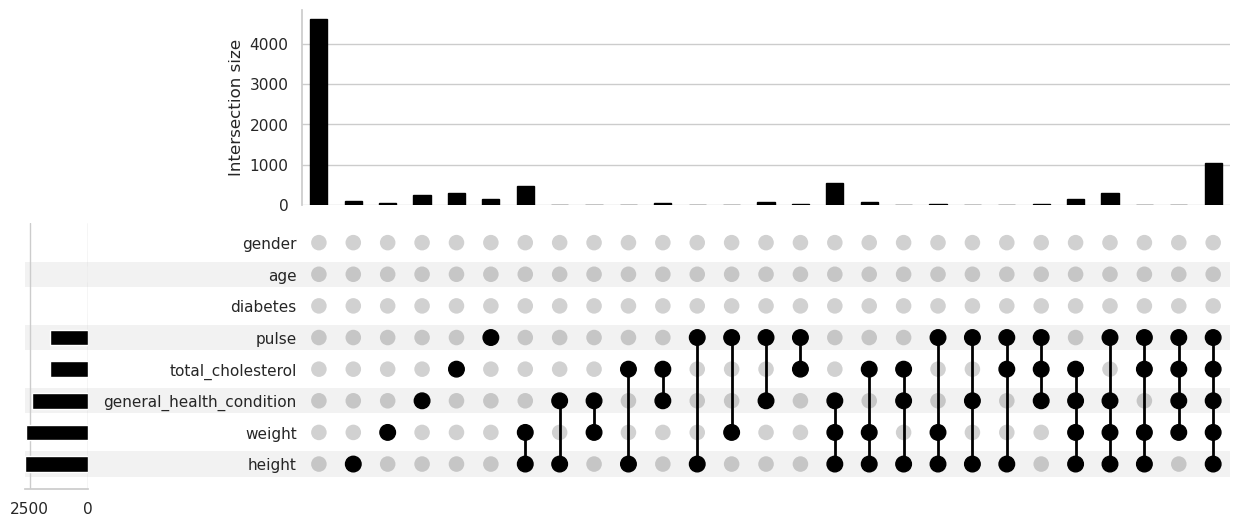

/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/missingno/missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/missingno/missingno.py:141: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


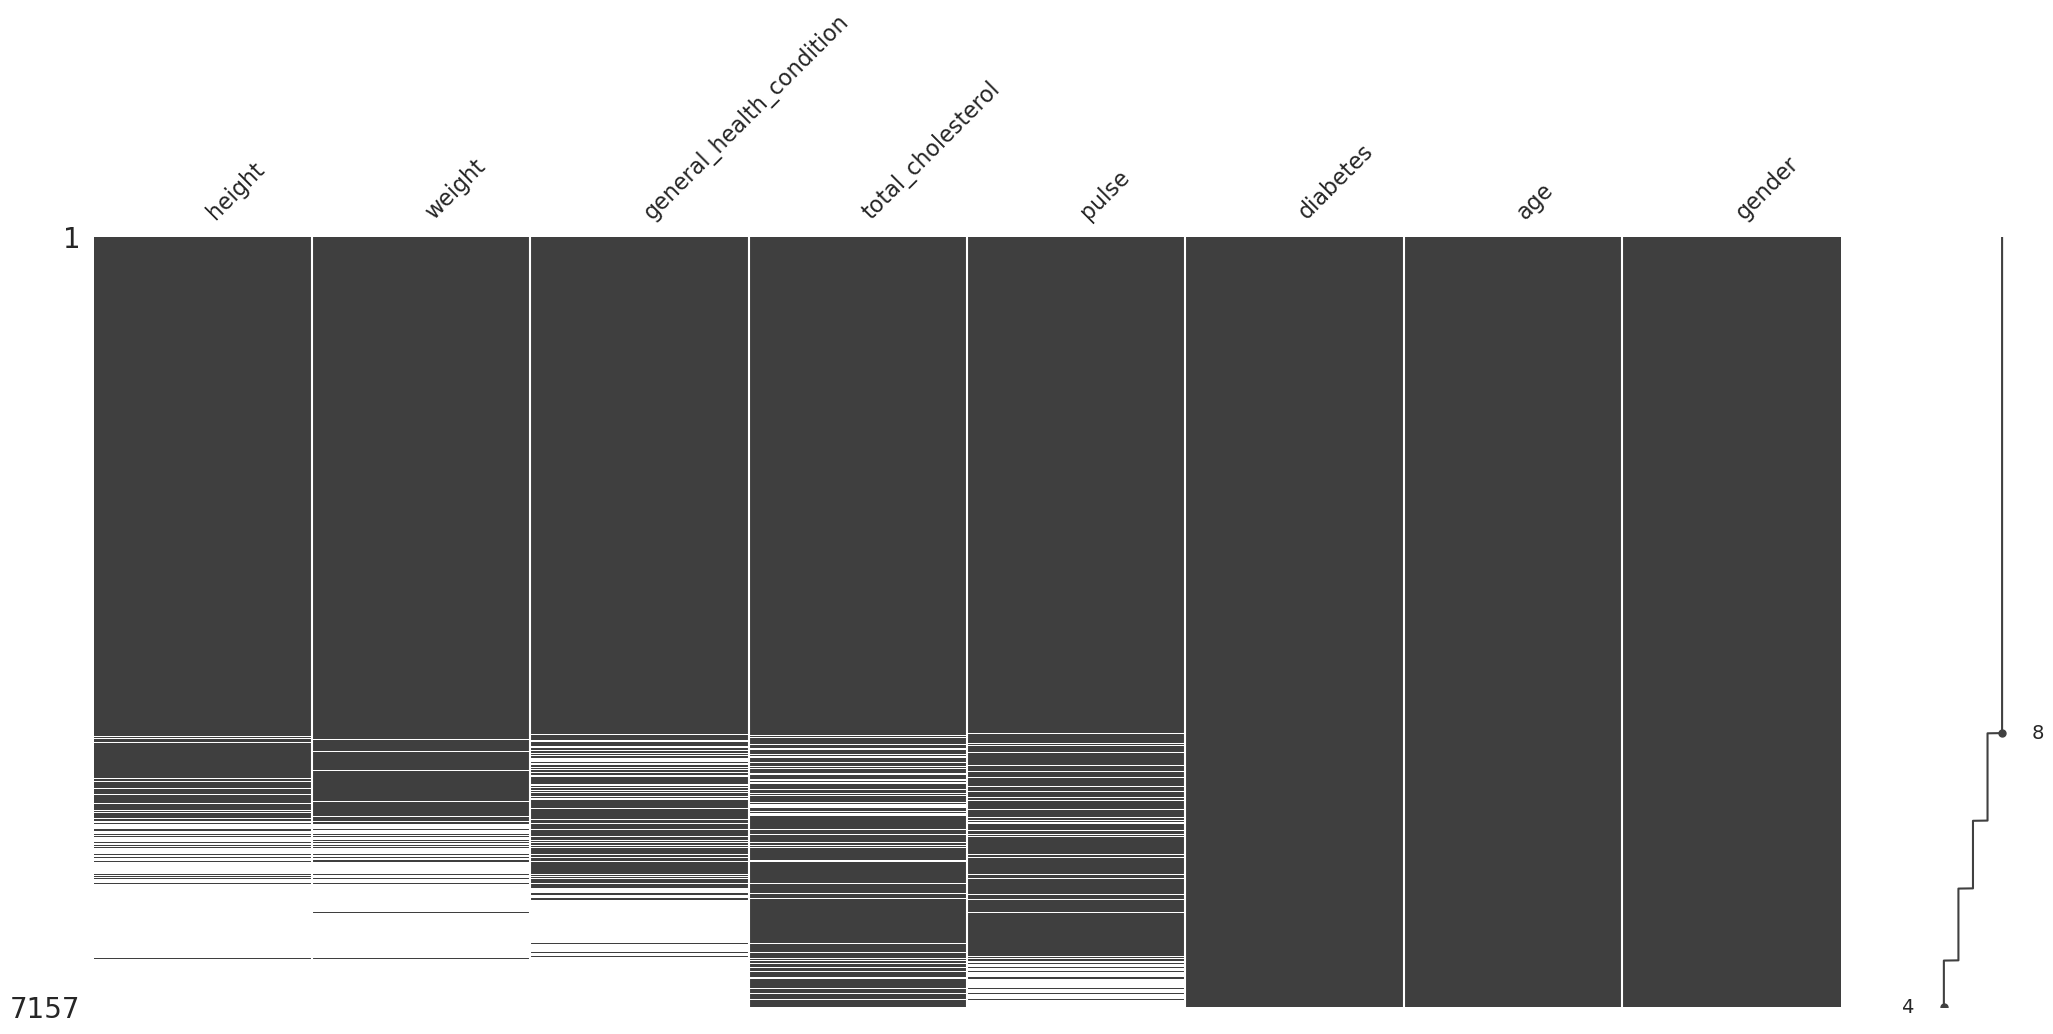

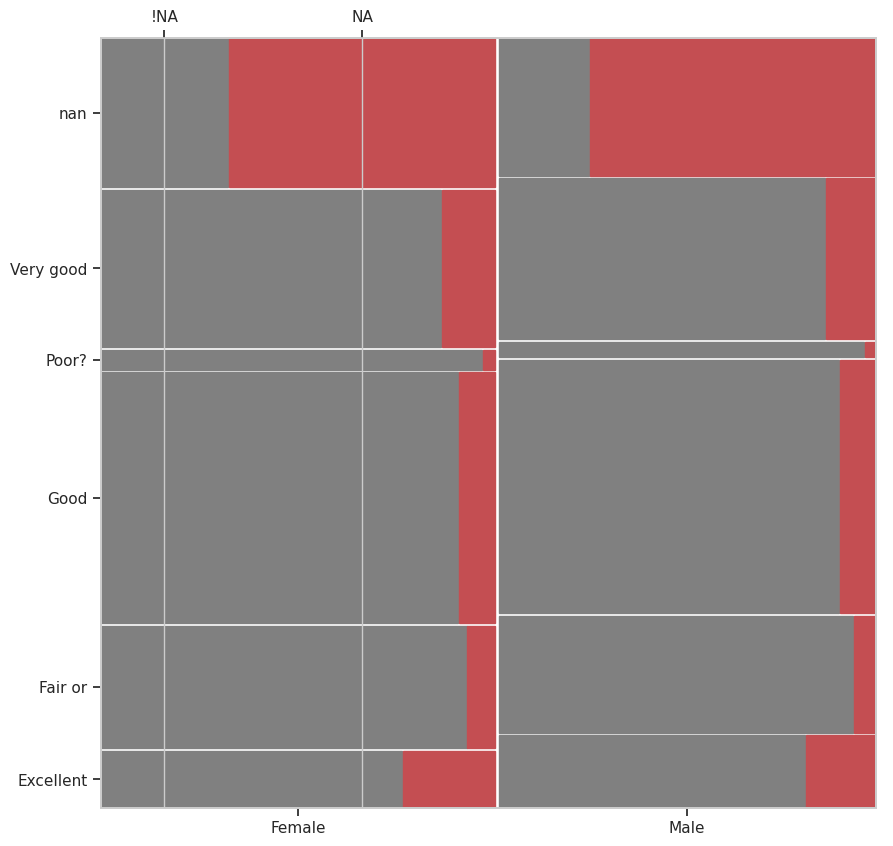

/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)
/home/sathony/miniforge3/envs/missing_data_imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.r

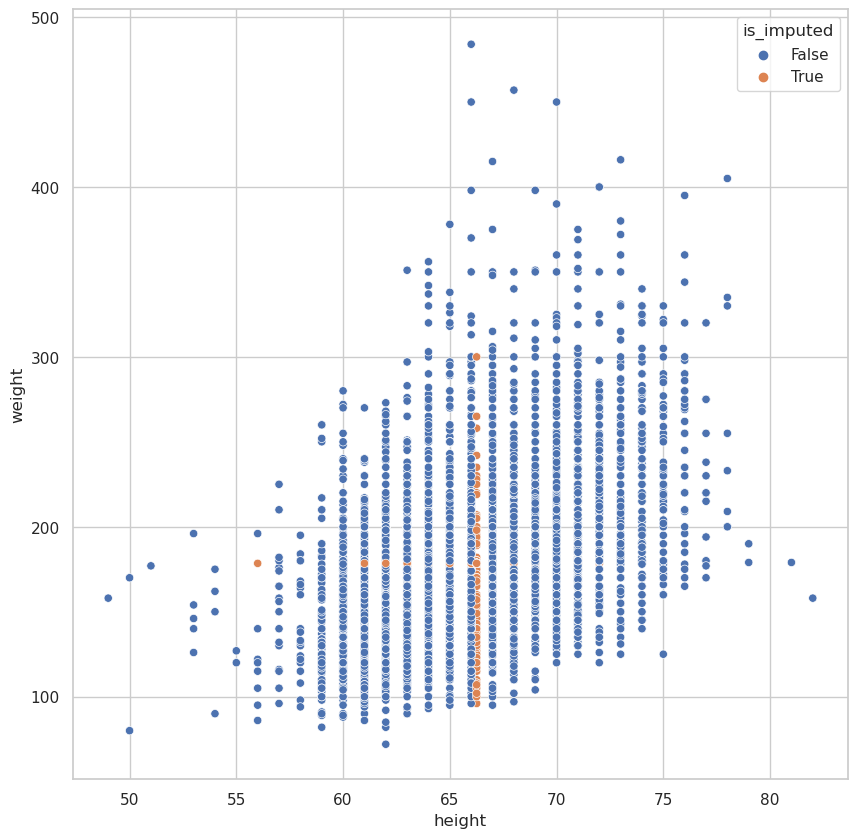

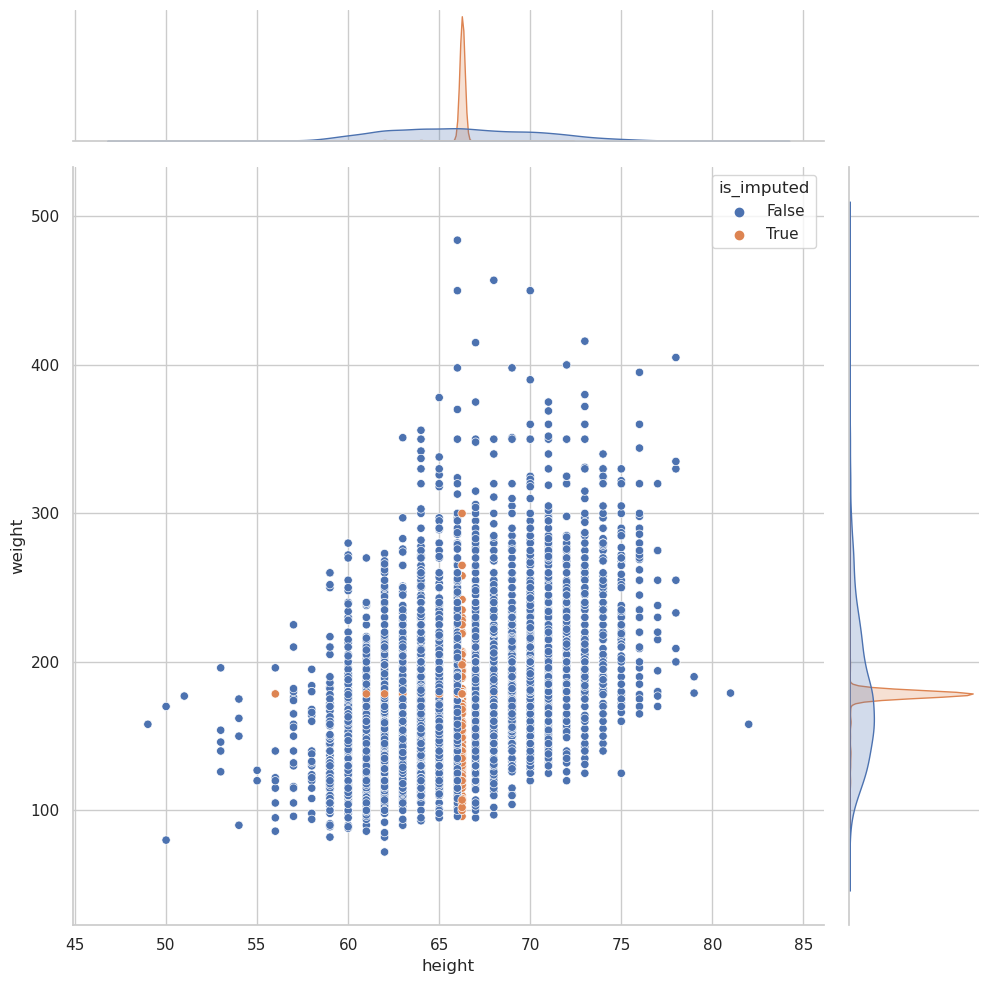

In [1]:
%run "0.6-antoniolml-metodos-imputacion-valores-faltantes.ipynb"

## Imputación por llenado hacia atrás e imputación por llenado hacia adelante


otros posibles nombres: hotdayimputacion, coolddayimputacion

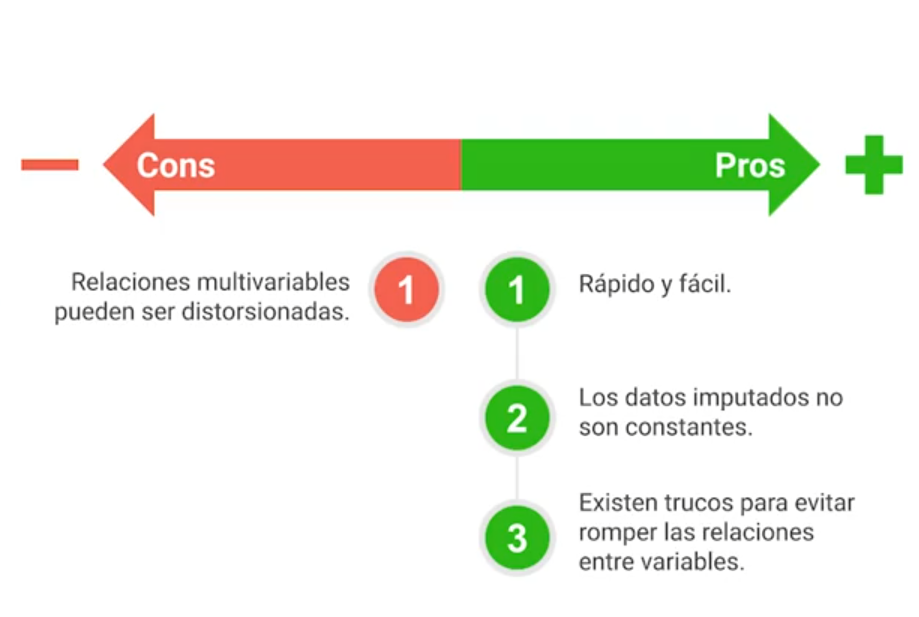

### `fillna()` vs `ffill()` o `bfill()`

In [2]:
(#imputaciones por llenado hacia atras o hacia adelante
    nhanes_df
    .select_columns("height", "weight") # seleccionar columnas
    # .fillna(method = "ffill") # llenado hacia adelante
    .ffill() # llenado hacia adelante shorcut de pandas mas rapido
)

,height,weight
SEQN,,
93705.0,63.0,165.0
93706.0,68.0,145.0
93707.0,68.0,145.0
93709.0,62.0,200.0
93711.0,69.0,142.0
...,...,...
102949.0,72.0,180.0
102953.0,65.0,218.0
102954.0,66.0,150.0


In [3]:
(
    nhanes_df
    .select_columns("height", "weight")
    # .fillna(method = "bfill") # llenado hacia atras
    .bfill() # llenado hacia atras shorcut de pandas mas rapido
)

,height,weight
SEQN,,
93705.0,63.0,165.0
93706.0,68.0,145.0
93707.0,62.0,200.0
93709.0,62.0,200.0
93711.0,69.0,142.0
...,...,...
102949.0,72.0,180.0
102953.0,65.0,218.0
102954.0,66.0,150.0


#### Recomendaciones al imputar valores utilizando `ffill()` o `bfill()`

> Imputación dentro de dominios e imputación a través de variables correlacionadas

In [4]:
(#para cada categoria podrian existir comportamientos distintos, por lo tanto si se hace un llenado hacia adelante o hacia atras estas perdiendo relacion entre todas las variables, por lo tanto se peude solucionar este problema haciendo imputacion dentro de los dominios
    nhanes_df
    .select_columns("height", "weight", "gender", "diabetes", "general_health_condition")
    .sort_values( # ordena primero mujeres o hombres respectivamente con sus valores
        by = ["gender", "diabetes", "general_health_condition", "height"],
        ascending = True
    )
    .transform_column(
        "weight", #la variable a transformar
        lambda x: x.ffill(), # llenado hacia adelante
        elementwise = False # ára que se aplique la función por grupo y no un unico valor
    )
)#resultado weith sin vvalores faltantes

,height,weight,gender,diabetes,general_health_condition
SEQN,,,,,
94421.0,56.0,115.0,Female,0,Excellent
94187.0,59.0,130.0,Female,0,Excellent
95289.0,59.0,162.0,Female,0,Excellent
97967.0,59.0,130.0,Female,0,Excellent
99125.0,59.0,105.0,Female,0,Excellent
...,...,...,...,...,...
96561.0,74.0,290.0,Male,1,NaN
96954.0,NaN,175.0,Male,1,NaN
97267.0,NaN,175.0,Male,1,NaN


que pasaria si en lugar de ordenar hay un cruce en el cual los valores faltantes de un dominio, estan cruzando al otro dominio, esta acarreando información de uno a otro, lo cual podemos definir que estamos introduciendo ruido. 

Otra copcion de realizar la imputacion es --> groupby definir los dominios de nuestras variables categoricas y dentro de los dominios ordenar por nuestras variables numericas 
#utilizando groupby

In [6]:
(
    nhanes_df
    .select_columns('height', 'weight', 'gender', 'diabetes', 'general_health_condition')
    .sort_values(by=['height', 'weight'], ascending=True)
    .groupby(
        by=['gender', 'diabetes', 'general_health_condition'],
        dropna=False,
    )
    .apply(lambda df: df[['height', 'weight']].ffill())
    .reset_index()
)

/tmp/ipykernel_52870/1942532761.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  nhanes_df


,SEQN,height,weight
0,94940.0,49.0,158.0
1,97877.0,50.0,80.0
2,96508.0,50.0,170.0
3,102379.0,51.0,177.0
4,95094.0,53.0,126.0
...,...,...,...
7152,102915.0,72.0,121.0
7153,102926.0,73.0,200.0
7154,102941.0,73.0,200.0
7155,102945.0,81.0,265.0
